# Business Problem: Stock Price Trend Prediction and Volatility Analysis

## Problem Statement:
- The stock market is inherently volatile, and predicting future stock prices can provide significant advantages for traders, investors, and financial institutions. The provided dataset contains daily trading data for a stock, including its opening, closing, highest, and lowest prices, as well as the trading volume. By analyzing this dataset, your goal is to predict future stock prices and assess stock volatility to make more informed trading decisions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 # ! pip install -q kaggle

In [ ]:
! kaggle datasets download -d syedfaizanalii/nividia-stock-dataset-2023-2024
! mkdir nvidia-dataset
! unzip nividia-stock-dataset-2023-2024.zip -d nvidia-dataset

Dataset URL: https://www.kaggle.com/datasets/syedfaizanalii/nividia-stock-dataset-2023-2024
License(s): apache-2.0
  0% 0.00/15.0k [00:00<?, ?B/s]
100% 15.0k/15.0k [00:00<00:00, 17.7MB/s]
Archive:  nividia-stock-dataset-2023-2024.zip
  inflating: nvidia-dataset/nvidia_stock_data.csv  


In [ ]:
df = pd.read_csv('/content/nvidia-dataset/nvidia_stock_data.csv', parse_dates=['Date'])
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000
1,2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000
2,2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000
3,2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000
4,2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000


## About the dataset:

**Date:** The specific date of the trading day (YYYY-MM-DD format).

**Open:** The stock's price at the start of the trading day.

**High:** The highest price the stock reached during the trading day.

**Low:** The lowest price the stock reached during the trading day.

**Close:** The stock's price at the end of the trading day.

**Adj Close (Adjusted Close):** The closing price after adjustments for corporate actions such as dividends, stock splits, etc. It provides a more accurate reflection of the stock's value over time.

**Volume:** The total number of shares traded during the trading day.

## Step 1: Data Processing

### 1.1 Check Data Types

In [ ]:
print(df.dtypes)

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
Daily_Returns           float64
dtype: object


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
count,435,435.000000,435.000000,435.000000,435.000000,435.000000,4.350000e+02,435.000000
mean,2023-11-17 04:04:57.931034368,62.839067,64.020060,61.557228,62.856315,62.842841,4.556561e+08,0.005383
min,2023-01-05 00:00:00,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08,-0.100046
25%,2023-06-12 12:00:00,40.318001,40.990002,39.485001,40.218500,40.202612,3.603585e+08,-0.015009
50%,2023-11-15 00:00:00,47.629002,48.323002,46.750000,47.569000,47.558792,4.277170e+08,0.004291
75%,2024-04-23 12:00:00,90.078999,91.350502,88.417500,90.359501,90.344349,5.143315e+08,0.023050
max,2024-09-27 00:00:00,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09,0.243696
std,NaN,34.822055,35.533695,33.878140,34.708923,34.710036,1.585719e+08,0.032905


### 1.2 Check for null values

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### 1.3 Check for outliers
- We found 21 outliers in the Volume column.
- We will analyse these outliers in the analysing outliers section.

In [ ]:
# Calculate Q1 and Q3 for the entire DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR for all columns
IQR = Q3 - Q1

# Identify outliers across all columns
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Count the number of outliers in each column
outlier_counts_per_column = outliers.sum()

# Count the total number of outlier values
total_outlier_count = outliers.sum().sum()

print(f'Number of outliers in each column:\n{outlier_counts_per_column}')
print(f'Total number of outlier values: {total_outlier_count}')


Number of outliers in each column:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       21
dtype: int64
Total number of outlier values: 21


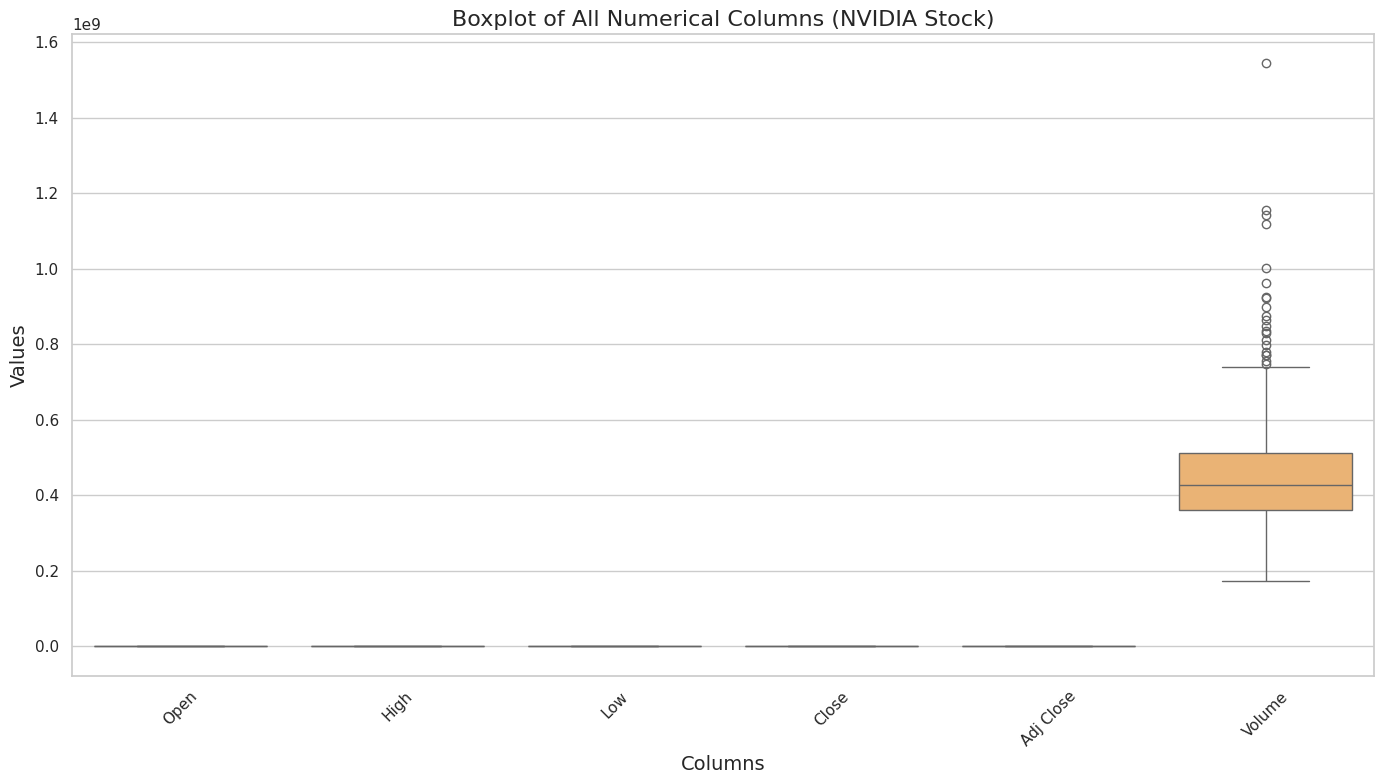

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a boxplot for all numeric columns
plt.figure(figsize=(14, 8))

# Select numeric columns only (to avoid non-numeric columns like Date, etc.)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for all numeric columns
sns.boxplot(data=df[numeric_cols], palette="Set3")

# Adding titles and labels
plt.title('Boxplot of All Numerical Columns (NVIDIA Stock)', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### 1.4 Handling Outliers

## Step 2: Feature Engineering

### 2.1 Add Daily Returns column
- To calculate the daily percentage change in closing prices, you can use the ```pct_change()``` function in pandas. This function computes the percentage change between the current and previous row.
- Then remove the first row after calculating the daily percentage change because it contains a ```NAN``` value.

In [ ]:
df['Daily_Returns'] = df['Close'].pct_change()
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,0.030318
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,-0.032816
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,0.041640
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,0.051753
5,2023-01-10,15.507000,15.962000,15.472000,15.909000,15.898532,384101000,0.017981
...,...,...,...,...,...,...,...,...
432,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,0.002241
433,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,0.039653
434,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,0.021842
435,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,0.004291


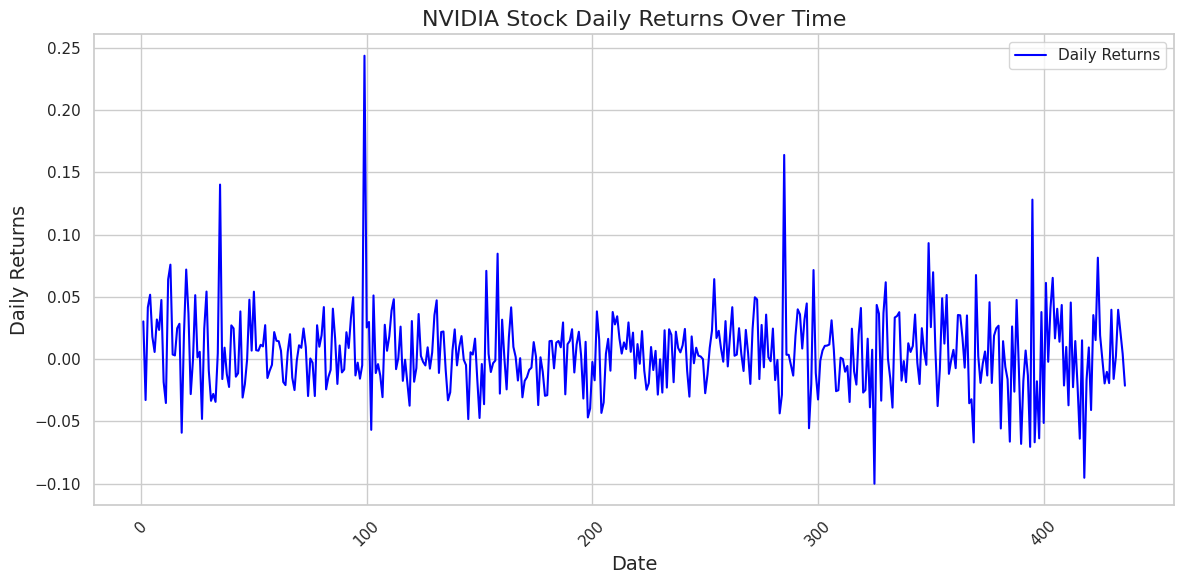

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Returns'], color='blue', label='Daily Returns')

# Adding titles and labels
plt.title('NVIDIA Stock Daily Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Returns', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


### 2.2 Add Moving Averages column
- Compute short-term (e.g., 5-day) and long-term (e.g., 50-day) moving averages to identify trends.

In [ ]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=50).mean()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Short_MA,Long_MA
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,0.030318,NaN,NaN
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,-0.032816,NaN,NaN
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,0.041640,NaN,NaN
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,0.051753,NaN,NaN
5,2023-01-10,15.507000,15.962000,15.472000,15.909000,15.898532,384101000,0.017981,15.082000,NaN
...,...,...,...,...,...,...,...,...,...,...
432,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,0.002241,115.818001,115.9278
433,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,0.039653,116.874002,115.7764
434,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,0.021842,118.902002,115.7194
435,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,0.004291,120.136002,115.8404


### 2.3 Add TR and ATR
- The ATR helps traders assess the volatility of a stock. When the ATR is rising, the stock tends to experience higher volatility, and when the ATR is falling, the stock shows lower volatility.
- High ATR values indicate large price movements, while low ATR values suggest smaller price movements or low volatility.

In [ ]:
# Calculate True Range (TR)
df['Previous Close'] = df['Close'].shift(1)

df['TR'] = df[['High', 'Low']].apply(lambda x: x['High'] - x['Low'], axis=1)
df['TR_high_pc'] = abs(df['High'] - df['Previous Close'])
df['TR_low_pc'] = abs(df['Low'] - df['Previous Close'])

# True Range is the maximum of the three calculated ranges
df['TR'] = df[['TR', 'TR_high_pc', 'TR_low_pc']].max(axis=1)

# Calculate Average True Range (ATR) over a window, typically 14 periods
df['ATR'] = df['TR'].rolling(window=14).mean()

df.drop(['Previous Close', 'TR_high_pc', 'TR_low_pc'], axis=1, inplace=True)


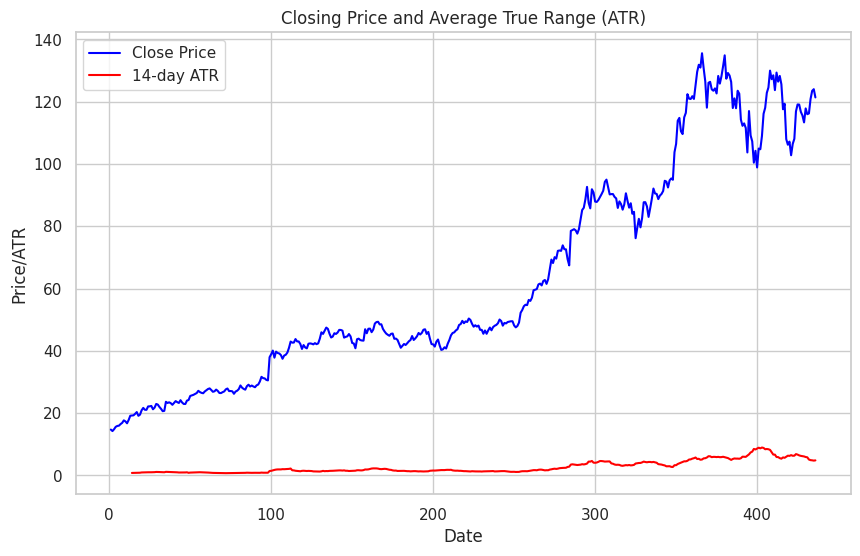

In [ ]:
# Plot Closing Price and ATR
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['ATR'], label='14-day ATR', color='red')

# Adding labels and title
plt.title('Closing Price and Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('Price/ATR')
plt.legend()

# Show the plot
plt.show()


Based on the graph, several key observations can be made:

- Price trend: The closing price (blue line) shows a strong upward trend over time, with the price increasing from around 20 at the beginning to over 120 by the end of the period.
- Volatility increase: As the price rises, the volatility appears to increase, especially in the latter half of the chart where price swings become more pronounced.
- ATR trend: The 14-day Average True Range (ATR, red line) remains relatively low and stable for most of the period, but shows a slight increase towards the end, coinciding with the higher price volatility.
- Price acceleration: There's a noticeable acceleration in price growth around the 250-300 date range, where the slope of the price line becomes steeper.
- Recent consolidation: Towards the very end of the chart, there's a period of consolidation or slight pullback after reaching peak prices.
- Correlation: The ATR seems to have a loose positive correlation with price, generally increasing as the price increases, though the relationship is not strong throughout the entire period.

These observations suggest a security or asset that has experienced significant growth over time, with increasing volatility as its price has risen. The relatively low and stable ATR for most of the period indicates that despite the price increase, daily trading ranges remained somewhat consistent until the later stages of the trend.
For investors or traders, this chart might indicate a strong bullish trend with increasing risk (as measured by ATR) in the latter stages.

### 2.4 Add Bollinger Bands columns

In [ ]:
# Set the window for calculating the moving average and standard deviation
window = 20

# Calculate the Moving Average (Middle Band)
df['MA'] = df['Close'].rolling(window=window).mean()

# Calculate the standard deviation
df['STD'] = df['Close'].rolling(window=window).std()

# Calculate the Upper and Lower Bollinger Bands
df['Upper Band'] = df['MA'] + (df['STD'] * 2)
df['Lower Band'] = df['MA'] - (df['STD'] * 2)

# Drop any NaN values that may result from rolling calculations
df.dropna(inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Short_MA,Long_MA,TR,ATR,MA,STD,Upper Band,Lower Band
50,2023-03-16,24.027000,25.587999,23.893999,25.541000,25.528532,583253000,0.054193,23.952600,20.68170,1.694000,0.934429,23.129500,1.184920,25.499339,20.759661
51,2023-03-17,25.982000,26.399000,25.667999,25.725000,25.712439,848547000,0.007204,24.504600,20.90122,0.858000,0.953286,23.315650,1.286550,25.888749,20.742551
52,2023-03-20,25.615000,26.024000,25.129999,25.900000,25.887354,432747000,0.006803,25.091400,21.13392,0.894001,0.972929,23.541250,1.325739,26.192729,20.889771
53,2023-03-21,26.180000,26.392000,25.381001,26.198999,26.186207,547408000,0.011544,25.518600,21.36072,1.011000,0.991714,23.818450,1.268868,26.356187,21.280713
54,2023-03-22,26.424999,27.589001,26.237000,26.468000,26.455076,797295000,0.010268,25.966600,21.57752,1.390001,1.023286,24.104150,1.182933,26.470016,21.738283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,0.002241,115.818001,115.92780,2.129997,5.127858,115.358500,7.086131,129.530763,101.186237
433,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,0.039653,116.874002,115.77640,6.420006,4.932859,115.079000,6.726315,128.531630,101.626371
434,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,0.021842,118.902002,115.71940,4.070000,4.874287,114.839500,6.302725,127.444951,102.234050
435,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,0.004291,120.136002,115.84040,5.869995,4.779287,114.761000,6.169897,127.100794,102.421207


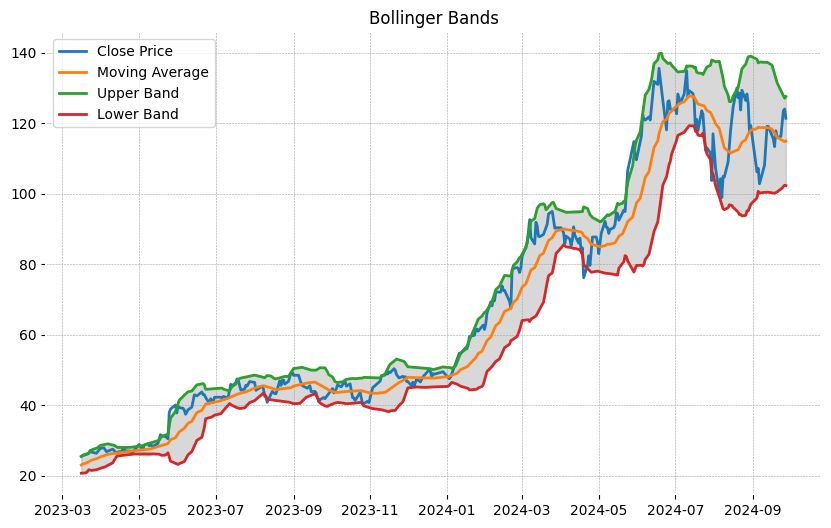

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA'], label='Moving Average')
plt.plot(df['Date'], df['Upper Band'], label='Upper Band')
plt.plot(df['Date'], df['Lower Band'], label='Lower Band')
plt.fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='grey', alpha=0.3)
plt.legend(loc='best')
plt.title('Bollinger Bands')
plt.show()


Based on this Bollinger Bands chart, several key observations can be made:

- Overall uptrend: The asset's price has shown a strong upward trend from March 2023 to September 2024, rising from around $20 to over $120.
- Volatility changes: The width between the upper and lower Bollinger Bands has varied, indicating changes in volatility. It narrowed during periods of consolidation (e.g., late 2023) and widened during rapid price movements (e.g., mid-2024).
- Accelerated growth: There was a significant acceleration in price growth starting around January 2024, with the steepest climb occurring between March and May 2024.
- Recent consolidation: Since July 2024, the price has been consolidating, trading in a range between approximately $100 and $140.
- Band touches: The price has touched or exceeded the upper band several times during the uptrend, indicating strong bullish momentum. It has also touched the lower band occasionally, often followed by bounces.
- Volatility expansion: The recent consolidation phase shows wider Bollinger Bands compared to earlier periods, suggesting increased volatility.
- Moving average trend: The moving average (orange line) shows a clear upward slope, confirming the overall bullish trend.

Conclusions:

- The asset has been in a strong bull market over the past year and a half.
- The recent consolidation phase might indicate a potential pause in the uptrend or a preparation for the next move (either continuation or reversal).
- Volatility has increased in recent months, which could signal increased uncertainty or potential for larger price swings.
- The overall trend remains bullish as long as the price stays above the moving average and lower Bollinger Band.
- For traders or investors, this chart suggests maintaining a bullish bias but with increased caution due to the recent consolidation and higher volatility. It would be prudent to watch for a potential breakout from the current range for signals of the next significant move.

## Step 3: Exploratory Data Analysis

### 3.1 Visualize Stock Price Trends:

#### Plot the time series of Open, Close, High, Low prices

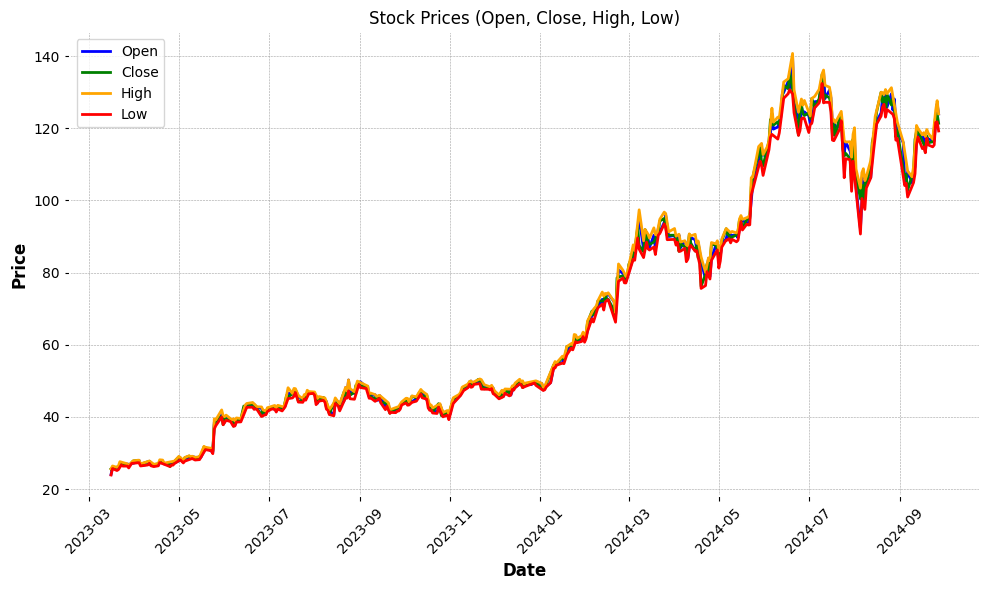

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['Close'], label='Close', color='green')
plt.plot(df['Date'], df['High'], label='High', color='orange')
plt.plot(df['Date'], df['Low'], label='Low', color='red')

plt.title('Stock Prices (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


#### Plot moving averages to visualize trends over time.

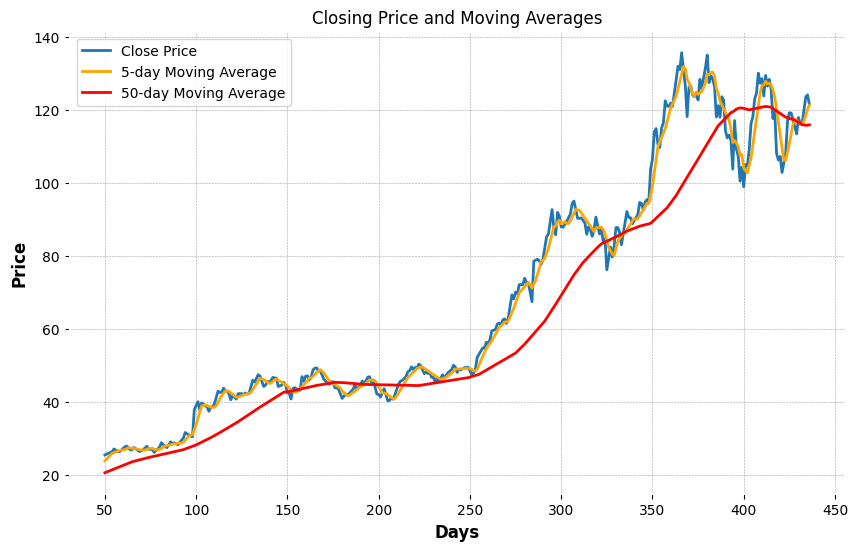

In [ ]:
# Plot the closing price and both moving averages
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Short_MA'], label='5-day Moving Average', color='orange')
plt.plot(df['Long_MA'], label='50-day Moving Average', color='red')

# Adding labels and title
plt.title('Closing Price and Moving Averages')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

### 3.2 Volume vs Price Movement

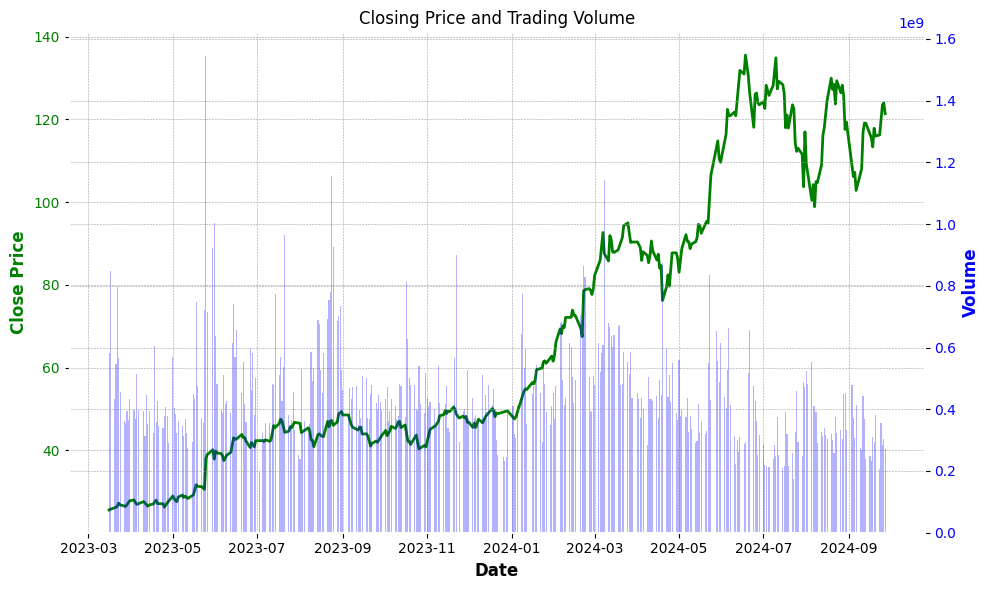

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the closing price on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='green')
ax1.plot(df['Date'], df['Close'], label='Close Price', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis for the volume
ax2 = ax1.twinx()  # Instantiate a second axis that shares the same x-axis
ax2.set_ylabel('Volume', color='blue')
ax2.bar(df['Date'], df['Volume'], label='Volume', color='blue', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='blue')

# Add titles and layout
plt.title('Closing Price and Trading Volume')
fig.tight_layout()  # Ensure proper spacing
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

### 3.3 Price Volatility:

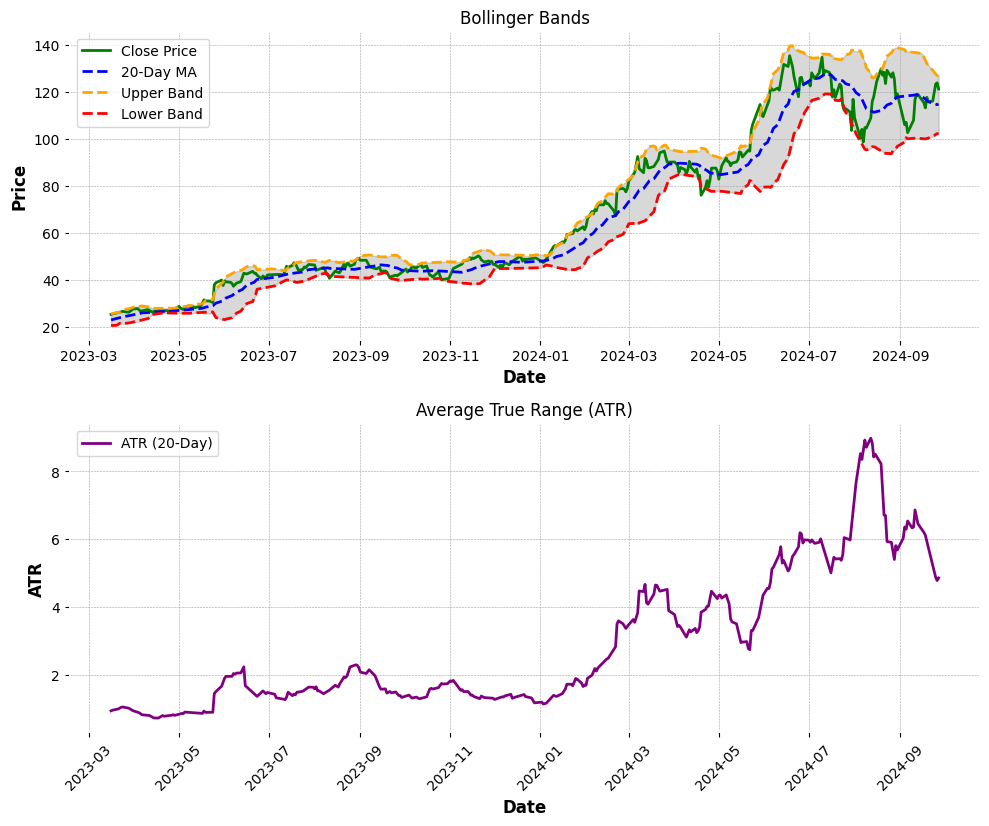

In [ ]:
# Create a figure to plot Bollinger Bands and ATR
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot Bollinger Bands with closing price on the first axis
ax1.plot(df['Date'], df['Close'], label='Close Price', color='green')
ax1.plot(df['Date'], df['MA'], label='20-Day MA', color='blue', linestyle='--')
ax1.plot(df['Date'], df['Upper Band'], label='Upper Band', color='orange', linestyle='--')
ax1.plot(df['Date'], df['Lower Band'], label='Lower Band', color='red', linestyle='--')
ax1.fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='grey', alpha=0.3)

ax1.set_title('Bollinger Bands')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
ax1.grid(True)

# Plot ATR on the second axis
ax2.plot(df['Date'], df['ATR'], label='ATR (20-Day)', color='purple')
ax2.set_title('Average True Range (ATR)')
ax2.set_xlabel('Date')
ax2.set_ylabel('ATR')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)

# Show plot
plt.show()

### 3.4 Correlations:

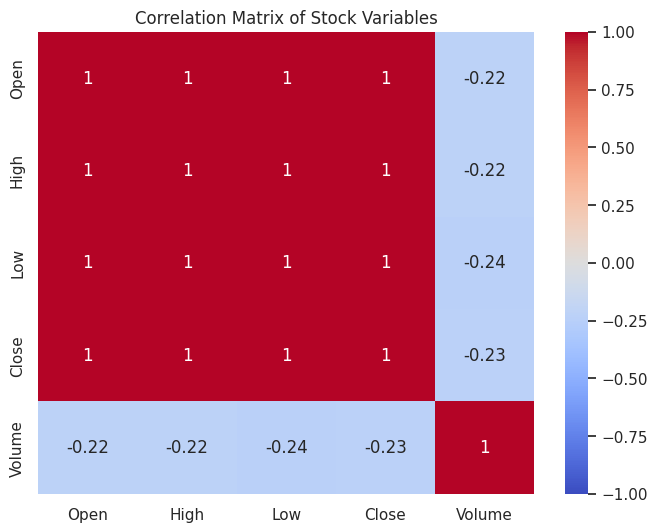

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Variables')
plt.show()


This correlation matrix provides several key insights about the relationships between different stock variables:

- Price variables correlation: Open, High, Low, and Close prices are perfectly correlated (correlation coefficient of 1) with each other. This indicates that these price metrics move in perfect unison.


- Volume and price relationship: Volume shows a weak negative correlation with all price variables (Open, High, Low, Close), with coefficients ranging from -0.22 to -0.24.
This suggests that as prices increase, trading volume tends to slightly decrease, and vice versa, though the relationship is not strong.


- Volume autocorrelation: Volume has a perfect positive correlation (1) with itself, which is expected in a correlation matrix diagonal.


- Symmetry: The matrix is symmetrical, as expected for a correlation matrix.


- Strength of relationships: The relationships between price variables are very strong (perfect correlation).
The relationship between volume and price variables is weak and inverse.

- Conclusions: Price movements are highly synchronized across all price metrics (Open, High, Low, Close).
There's a slight tendency for volume to move in the opposite direction of price, but this relationship is weak.
The strong correlation between price variables suggests that knowing one price metric can reliably predict the others.
The weak negative correlation with volume implies that volume alone may not be a strong predictor of price movements or vice versa.
Traders or analysts should be aware that these price variables don't provide unique information due to their perfect correlation, and may want to consider additional factors or technical indicators for a more comprehensive analysis.

## Step 4: Time Series Analysis for Trend Detection

### 4.1 Decompose Time Series:

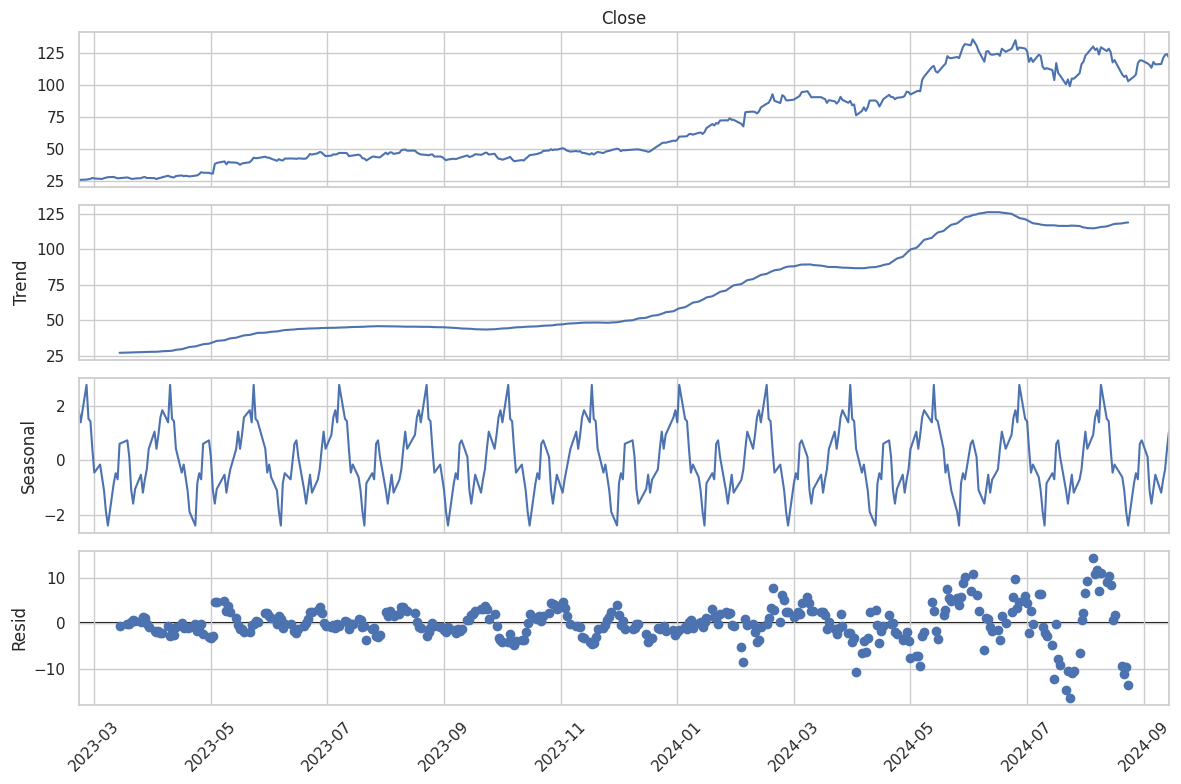

In [ ]:
# import statsmodels.api as sm

# df.set_index('Date', inplace = True)

# results = sm.tsa.seasonal_decompose(df['Close'], model = 'additive', period=30)
# results.plot()
# plt.show()

#import matplotlib.pyplot as plt
import statsmodels.api as sm

df.set_index('Date', inplace = True)

# Decompose the time series
results = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=30)

# Plot the decomposition
fig = results.plot()

# Adjust the figure size (optional if you want more space)
fig.set_size_inches(12, 8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Optional: Format the x-axis to show fewer labels (you can change interval to suit your data)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Optional: Format date labels (this will depend on your data's frequency)
fig.axes[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Show the plot
plt.tight_layout()
plt.show()


This time series decomposition chart provides several insights about the stock's behavior:

- Close Price (Top Panel):

  - Overall upward trend from around $40 to over $100 over the period.
Significant acceleration in growth starting around early 2024.
Recent consolidation or slight pullback near the end of the period.


- Trend (Second Panel):

  - Confirms the overall upward trend seen in the close price.
Smooths out short-term fluctuations, showing a clearer picture of long-term movement.
Steepest increase occurs in the first half of 2024.


- Seasonal Component (Third Panel):

  - Clear repeating pattern, suggesting cyclical behavior in the stock price.
Cycle appears to repeat roughly every 2-3 months.
Amplitude of seasonal fluctuations remains fairly consistent throughout the period.


- Residual Component (Bottom Panel):

  - Represents the variations not explained by the trend or seasonal components.
  - Increased volatility in residuals towards the end of the period, with larger positive and negative spikes.
  - This suggests higher unpredictability or influence of external factors in recent months.



- Conclusions:

- The stock has shown strong overall growth, particularly accelerating in early 2024.
- There's a consistent seasonal pattern in the stock's price movements, which could be useful for short-term trading strategies.
- The increased residual volatility in recent months indicates higher market uncertainty or sensitivity to news/events.
- The recent flattening of the trend line suggests a possible slowdown in growth or consolidation phase.
- Traders might use this information to:

  - Align longer-term positions with the overall upward trend.
  - Consider the seasonal pattern for timing entry and exit points.
  - Be cautious of increased short-term unpredictability as shown by recent residuals.

### 4.2 Plot the original data and rolling mean (20-Days window)

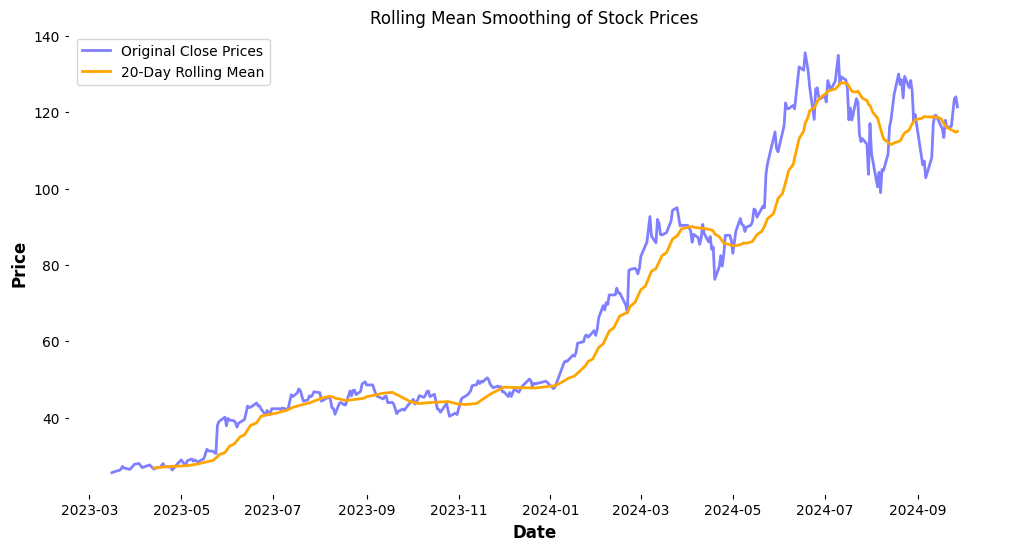

In [ ]:
df['Rolling Mean'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(df['Rolling Mean'], label='20-Day Rolling Mean', color='orange')
plt.title('Rolling Mean Smoothing of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Short_MA,Long_MA,TR,ATR,MA,STD,Upper Band,Lower Band,Rolling Mean
Date,,,,,,,,,,,,,,,,
2023-03-16,24.027000,25.587999,23.893999,25.541000,25.528532,583253000,0.054193,23.952600,20.68170,1.694000,0.934429,23.129500,1.184920,25.499339,20.759661,NaN
2023-03-17,25.982000,26.399000,25.667999,25.725000,25.712439,848547000,0.007204,24.504600,20.90122,0.858000,0.953286,23.315650,1.286550,25.888749,20.742551,NaN
2023-03-20,25.615000,26.024000,25.129999,25.900000,25.887354,432747000,0.006803,25.091400,21.13392,0.894001,0.972929,23.541250,1.325739,26.192729,20.889771,NaN
2023-03-21,26.180000,26.392000,25.381001,26.198999,26.186207,547408000,0.011544,25.518600,21.36072,1.011000,0.991714,23.818450,1.268868,26.356187,21.280713,NaN
2023-03-22,26.424999,27.589001,26.237000,26.468000,26.455076,797295000,0.010268,25.966600,21.57752,1.390001,1.023286,24.104150,1.182933,26.470016,21.738283,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,0.002241,115.818001,115.92780,2.129997,5.127858,115.358500,7.086131,129.530763,101.186237,115.358500
2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,0.039653,116.874002,115.77640,6.420006,4.932859,115.079000,6.726315,128.531630,101.626371,115.079000
2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,0.021842,118.902002,115.71940,4.070000,4.874287,114.839500,6.302725,127.444951,102.234050,114.839500
